# Jogo da velha  
JOGO UTILIZANDO POO

Importando as libs necessárias

In [11]:
import random
import os

Modelagem da classe

Para modelagem do tabuleiro foi utilizado três listas dentro de uma matriz  
Estrutura ilustrada para modelagem do tabuleiro do jogo:  
    ![image](https://github.com/s2breninn/jogo-da-velha-em-python/assets/89087720/43660bf8-dfa4-48f2-bfd3-5863cd014862)

### Descrições das Funções

1. __`print_board()`__:  

    Esta função imprime o tabuleiro vazio, sem nenhuma marcação.  
    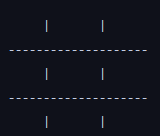  
  
2. __`reset()`__:  

    Esta função redefine o tabuleiro, removendo qualquer jogada anteriormente feita e restaurando-o para o estado inicial. Utiliza três listas aninhadas para representar a estrutura do tabuleiro.  

3. __`check_win_or_draw()`__:  

    Esta função verifica se há um vencedor utilizando oito condições diferentes, abrangendo vitórias verticais, horizontais e diagonais. Se um jogador vencer, a função exibe uma mensagem indicando o vencedor. Caso contrário, se não houver vencedor, verifica se ocorreu um empate.  
    
4. __`get_player_move()`__:  

    Esta função solicita que o jogador faça sua jogada, verificando se as coordenadas inseridas são válidas. Se as coordenadas forem inválidas (maiores que 2 ou menores que 0), uma mensagem será exibida ao jogador. Se a posição já estiver ocupada, a função informará que a posição já foi preenchida. Além disso, se forem inseridos caracteres não inteiros, uma mensagem será exibida pedindo para digitar apenas números.  
    
5. __`make_move()`__:  

    A função make_move percorre todas as listas da matriz utilizando uma list comprehension para determinar as posições vazias no tabuleiro. Em seguida, utilizando a biblioteca random e o método choice(), a função seleciona aleatoriamente uma posição para o computador jogar.
    
6. __Loop Principal__:

    O loop principal controla o fluxo do jogo. Ele limpa a tela do console, imprime o tabuleiro, e então inicia outro loop que continua até que o jogo termine. Dentro desse loop, o jogador faz sua jogada, o jogo verifica se houve um vencedor ou empate, e então é a vez do computador fazer sua jogada. Após cada jogada, o tabuleiro é impresso novamente e o jogo verifica se houve um vencedor ou empate. Após o fim do jogo, o jogador é solicitado a digitar '1' para sair do jogo ou qualquer outra tecla para jogar novamente. Se '1' for digitado, o loop principal é encerrado, caso contrário, o tabuleiro é redefinido para uma nova partida.


In [1]:
import random
import os

class TicTacToe:
    def __init__(self):
        self.reset()

    def print_board(self):
        print('')
        print(' ' + self.board[0][0] + '   |   ' + self.board[0][1] + '   |   ' + self.board[0][2])
        print('--------------------')
        print(' ' + self.board[1][0] + '   |   ' + self.board[1][1] + '   |   ' + self.board[1][2])
        print('--------------------')
        print(' ' + self.board[2][0] + '   |   ' + self.board[2][1] + '   |   ' + self.board[2][2])

    def reset(self):
        self.board = [[' ', ' ', ' '], [' ', ' ', ' '], [' ', ' ', ' ']]
        self.done = ''

    def check_win_or_draw(self):
        for i in ['X', 'O']:
            # Horizontais, Verticais e Diagonais
            if (self.board[0][0] == self.board[0][1] == self.board[0][2] == i or
                self.board[1][0] == self.board[1][1] == self.board[1][2] == i or
                self.board[2][0] == self.board[2][1] == self.board[2][2] == i or
                self.board[0][0] == self.board[1][0] == self.board[2][0] == i or
                self.board[0][1] == self.board[1][1] == self.board[2][1] == i or
                self.board[0][2] == self.board[1][2] == self.board[2][2] == i or
                self.board[0][0] == self.board[1][1] == self.board[2][2] == i or
                self.board[2][0] == self.board[1][1] == self.board[0][2] == i):
                self.done = i
                print(i + ' venceu')
                return

        # Empate
        if all(self.board[i][j] != ' ' for i in range(3) for j in range(3)):
            self.done = 'e'
            print('Empate!')

    def get_player_move(self):
        invalid_move = True

        while invalid_move:
            try:
                x = int(input('Digite a linha do seu próximo lance: '))
                y = int(input('Digite a coluna do seu próximo lance: '))

                if x < 0 or x > 2 or y < 0 or y > 2:
                    print('Coordenadas inválidas.')
                    continue

                if self.board[x][y] != ' ':
                    print('Posição já preenchida')
                    continue

            except ValueError:
                print('Digite apenas números inteiros.')
                continue

            invalid_move = False
        self.board[x][y] = 'X'

    def make_move(self):
        list_moves = [(i, j) for i in range(3) for j in range(3) if self.board[i][j] == ' ']

        if list_moves:
            x, y = random.choice(list_moves)
            self.board[x][y] = 'O'

tictactoe = TicTacToe()

while True:
    os.system('cls' if os.name == 'nt' else 'clear')
    tictactoe.print_board()

    while tictactoe.done == '':
        tictactoe.get_player_move()
        tictactoe.check_win_or_draw()
        if tictactoe.done:
            break
        tictactoe.make_move()
        tictactoe.print_board()
        tictactoe.check_win_or_draw()

    play_again = input('Digite 1 para sair do jogo ou tecle qualquer tecla para jogar novamente: ')
    if play_again == '1':
        break
    else:
        tictactoe.reset()



     |       |    
--------------------
     |       |    
--------------------
     |       |    
Digite a linha do seu próximo lance: 1
Digite a coluna do seu próximo lance: 1

     |       |    
--------------------
     |   X   |    
--------------------
     |   O   |    
Digite a linha do seu próximo lance: 0
Digite a coluna do seu próximo lance: 1

     |   X   |    
--------------------
     |   X   |    
--------------------
 O   |   O   |    
Digite a linha do seu próximo lance: 0
Digite a coluna do seu próximo lance: 0

 X   |   X   |    
--------------------
     |   X   |   O
--------------------
 O   |   O   |    
Digite a linha do seu próximo lance: 2
Digite a coluna do seu próximo lance: 2
X venceu
Digite 1 para sair do jogo ou tecle qualquer tecla para jogar novamente: 1
